In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import ffn
import scipy

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from Investment import Backtestlib

/Users/nuthdanai/Desktop/Dashboard Recession
##########



In [143]:
data =  pd.read_excel("Data/index_TR.xlsx", index_col=0)
data =  pd.read_excel("Data/index_TR.xlsx", index_col=0)
data

,Instrument,Date,Volume,Date.1,Price Close
0.0,.SPXTR,NaN,0.0,NaN,NaN
1.0,.SPXTR,NaN,0.0,NaN,NaN
2.0,.SPXTR,NaN,0.0,NaN,NaN
3.0,.SPXTR,NaN,0.0,NaN,NaN
4.0,.SPXTR,NaN,0.0,NaN,NaN
...,...,...,...,...,...
NaN,IGSB.O,2023-07-21T00:00:00Z,1103259.0,2023-07-21T00:00:00Z,50.24
NaN,IGSB.O,2023-07-24T00:00:00Z,3558066.0,2023-07-24T00:00:00Z,50.20
NaN,IGSB.O,2023-07-25T00:00:00Z,2793455.0,2023-07-25T00:00:00Z,50.17
NaN,IGSB.O,2023-07-26T00:00:00Z,4328597.0,2023-07-26T00:00:00Z,50.31


In [146]:
# Remove duplicates based on 'Date' and 'Instrument'
data = data.drop_duplicates(subset=['Date', 'Instrument'])

# Pivot the table
pivot_data = data.pivot(index='Date', columns='Instrument', values='Price Close')

# Display the first few rows of the pivoted data
pivot_data.head()


Instrument,.BSESNTR,.HSIDVN,.IDCOT7TR,.MERG0BC,.MIAPJ0000PUS,.MIWD00000PUS,.N225NTR,.NIFTRI,.SETI,.SPXTR,.SX5GR,BOND.K,BTC=,CNHPI=ECI,EEM,GLD,IGSB.O,MXWS.L,NDXEX.DE,OILOIL
Date,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-02T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-05T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-06T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-07T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
lst_dd = []
lst = []


try :
    for i in data.Instrument.unique() :
        print(i)
        data_i = data[data['Instrument'] == i]
        data_i.set_index('Date', inplace=True)
        data_i = data_i[[ "Price Close" ]]
        lst.append(data_i)
        data_i[i] = np.log( data_i['Price Close'] /  data_i['Price Close'].shift(1))

        data_i.dropna(inplace=True)
        
        topdrowdown , df_dd = Backtestlib.group_drawdown(data_i[i])
        df_dd["Instrument"] = i
        lst_dd.append( df_dd)
        df_dd.to_csv("Data/"+i + "_dd_.csv")
        topdrowdown.to_csv("Data/"+i + "_topdrowdown_.csv")
        

except :
    print("")

.SPXTR


/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(


.HSIDVN
MXWS.L


/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(
/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(


NDXEX.DE


/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(


.NIFTRI


/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(


.N225NTR


/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(


.BSESNTR


/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(


.SX5GR


/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(


GLD


/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(


EEM


/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(


.SETI


/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(


CNHPI=ECI
.IDCOT7TR


/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(
/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  topdrowdown = groups['Previous Peak','Drawdown'].apply(
/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowd

.MIWD00000PUS


/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(


BTC=
BOND.K
.MIAPJ0000PUS


/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(
/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  topdrowdown = groups['Previous Peak','Drawdown'].apply(
/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowd

OILOIL
.MERG0BC
IGSB.O


/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(
/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  topdrowdown = groups['Previous Peak','Drawdown'].apply(
/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowd

In [8]:
 data.Instrument.unique()

array(['.SETITRI', 'CNHPI=ECI', '.IDCOT7TR', '.MIWD00000PUS', 'BTC=',
       'BOND.K', '.MIAPJ0000PUS', 'OILOIL', '.MERG0BC', 'IGSB.O'],
      dtype=object)

In [24]:
data =  pd.read_csv("Data/EVEN_TEST2.csv", index_col=0)
data = data.dropna()
lst_dd = []
lst = []


try :
    for i in data.Instrument.unique() :
        print(i)
        data_i = data[data['Instrument'] == i]
        data_i.set_index('Date', inplace=True)
        data_i = data_i[[ "Close Price" ]]
        lst.append(data_i)
        data_i[i] = np.log( data_i['Close Price'] /  data_i['Close Price'].shift(1))

        data_i.dropna(inplace=True)
        topdrowdown , df_dd = Backtestlib.group_drawdown(data_i[i])
        df_dd["Instrument"] = i
        lst_dd.append( df_dd)
        df_dd.to_csv("Data/"+i + "_dd_.csv")
        topdrowdown.to_csv("Data/"+i + "_topdrowdown_.csv")
        
        



except :
    print("")

.SETITRI


/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(


.IDCOT7TR


/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(


.MIWD00000PUS


/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(


BOND.K
.MIAPJ0000PUS


/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(
/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(


.MERG0BC


/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(


IGSB.O


/Users/nuthdanai/Desktop/Dashboard Recession/Investment/Backtestlib.py:201: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topdrowdown = groups['Previous Peak','Drawdown'].apply(


In [23]:
data =  pd.read_csv("Data/EVEN_TEST2.csv", index_col=0)
data 

,Instrument,Date,Close Price
0,.SETITRI,1970-01-01T00:00:00Z,NaN
1,.SETITRI,1970-01-02T00:00:00Z,NaN
2,.SETITRI,1970-01-05T00:00:00Z,NaN
3,.SETITRI,1970-01-06T00:00:00Z,NaN
4,.SETITRI,1970-01-07T00:00:00Z,NaN
...,...,...,...
108149,IGSB.O,2021-12-27T00:00:00Z,53.885
108150,IGSB.O,2021-12-28T00:00:00Z,53.880
108151,IGSB.O,2021-12-29T00:00:00Z,53.870
108152,IGSB.O,2021-12-30T00:00:00Z,53.900


In [22]:
data_i[i]

Date
2007-08-30T00:00:00Z    0.004946
2007-08-31T00:00:00Z    0.000000
2007-09-03T00:00:00Z    0.000000
2007-09-04T00:00:00Z    0.000000
2007-09-05T00:00:00Z    0.000000
                          ...   
2021-12-23T00:00:00Z    0.000000
2021-12-24T00:00:00Z    0.000000
2021-12-27T00:00:00Z    0.000000
2021-12-28T00:00:00Z    0.000000
2021-12-29T00:00:00Z    0.000000
Name: .SETITRI, Length: 3742, dtype: float64

<AxesSubplot:>

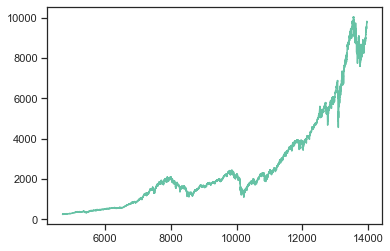

In [164]:
data[data['Instrument'] == ".SPXTR"]["Price Close"].plot()

In [162]:
data

,Instrument,Date,Volume,Date.1,Price Close
0.0,.SPXTR,NaN,0.0,NaN,NaN
4697.0,.SPXTR,1988-01-04T00:00:00Z,NaN,1988-01-04T00:00:00Z,256.015
4698.0,.SPXTR,1988-01-05T00:00:00Z,NaN,1988-01-05T00:00:00Z,258.770
4699.0,.SPXTR,1988-01-06T00:00:00Z,NaN,1988-01-06T00:00:00Z,259.030
4700.0,.SPXTR,1988-01-07T00:00:00Z,NaN,1988-01-07T00:00:00Z,261.211
...,...,...,...,...,...
NaN,IGSB.O,2023-07-20T00:00:00Z,2038496.0,2023-07-20T00:00:00Z,50.200
NaN,IGSB.O,2023-07-21T00:00:00Z,1103259.0,2023-07-21T00:00:00Z,50.240
NaN,IGSB.O,2023-07-24T00:00:00Z,3558066.0,2023-07-24T00:00:00Z,50.200
NaN,IGSB.O,2023-07-25T00:00:00Z,2793455.0,2023-07-25T00:00:00Z,50.170


In [4]:
topdrowdown

NameError: name 'topdrowdown' is not defined

# STaet

In [135]:
recession_starts  = pd.read_csv("Data/Recession.csv", index_col=0)


recession_data['recession_start'] = (recession_data['USREC'] > recession_data['USREC'].shift(1))
recession_starts = recession_data[recession_data['recession_start'] == True]



In [138]:
recession_starts = recession_starts.tail(5)

In [141]:
recession_starts .to_csv("recession.csv")

1981-08-01
1990-08-01
2001-04-01
2008-01-01
2020-03-01


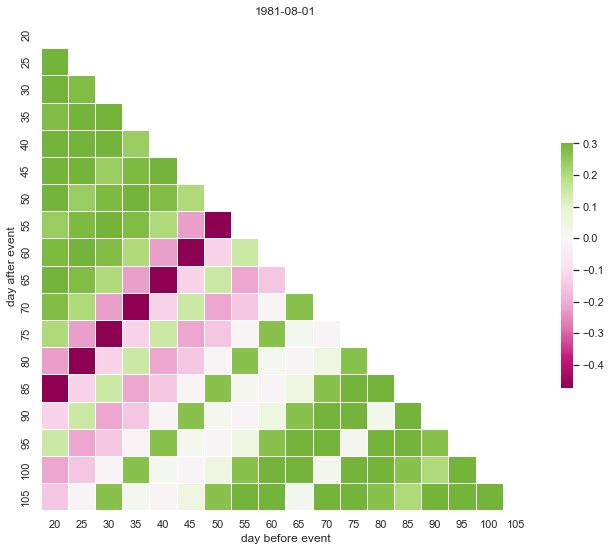

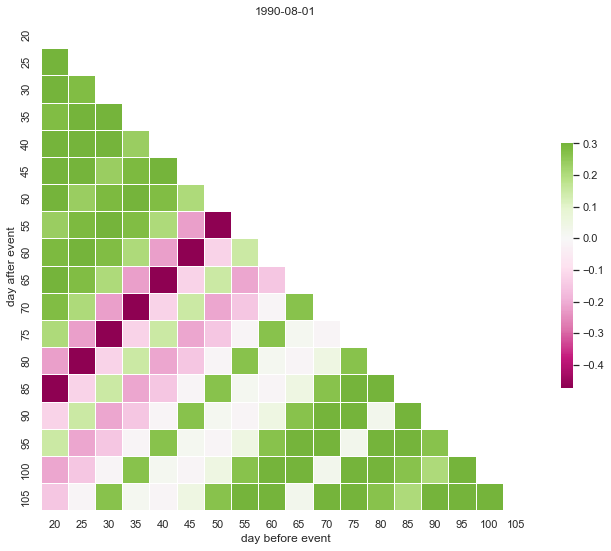

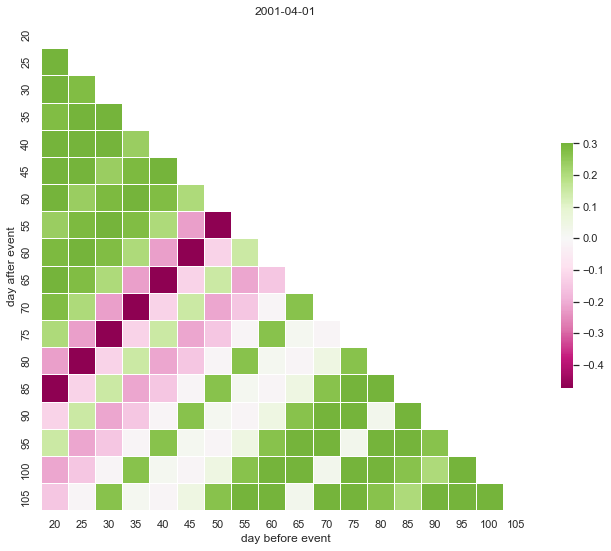

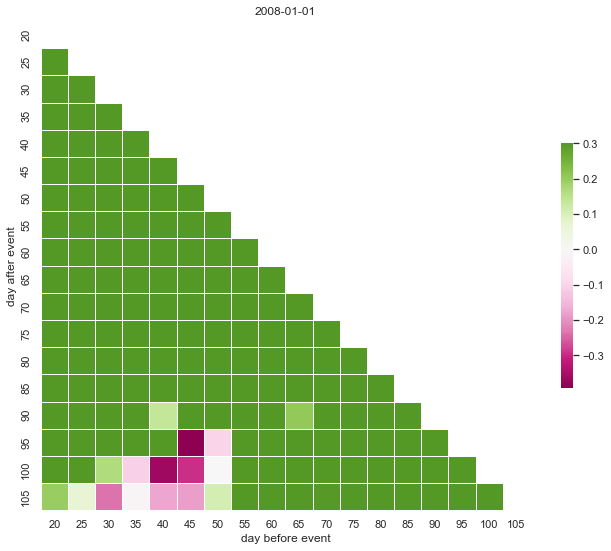

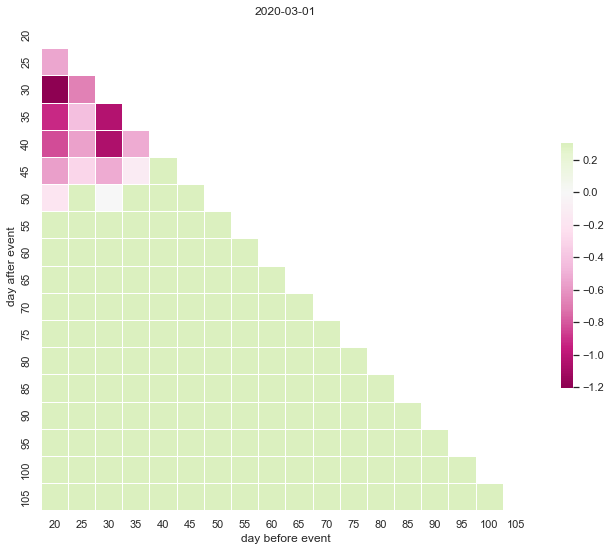

In [131]:


 
dic_aa = {} 

for date in recession_starts.index :
    print(date)
    
    lst = []
    for i_start in range(20, 110 , 5) :
       # print("i_Start " , i_start)
        
        dic_of_return = {}
        
        for i_End in range(20, 110 , 5) :
            #print("i_End " , i_End)
            
            dic_of_return[i_End] = data_i[data_i.index > ( str( pd.to_datetime( date)  - pd.DateOffset(days=i_start)))].head(i_start+i_End).pct_change(i_start+i_End -1).tail(1)["Close Price"][0]
        
        df = pd.DataFrame(dic_of_return, index=["return"]).T
        df["day after event"] = df.index
        df["day before event"] = i_start
        
        lst.append(df)
        
    aa = pd.concat(lst).pivot_table(values='return', index=['day after event'], columns='day before event') *100
    dic_aa[date] = aa
    
    
    mask = np.triu(np.ones_like(aa, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    plt.title(date)
    sns.set_style('whitegrid')

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(aa, mask=mask, cmap="PiYG", vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
            
            
            
            
        
        

In [133]:
dic_aa["1981-08-01"]

day before event,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105
day after event,,,,,,,,,,,,,,,,,,
20,0.635498,0.785238,0.795221,0.276121,0.346000,0.455810,0.645481,0.236190,0.286104,0.326035,0.276121,0.206242,-0.223013,-0.472581,-0.123186,0.146346,-0.213031,-0.153134
25,0.785238,0.795221,0.276121,0.346000,0.455810,0.645481,0.236190,0.286104,0.326035,0.276121,0.206242,-0.223013,-0.472581,-0.123186,0.146346,-0.213031,-0.153134,-0.013377
30,0.795221,0.276121,0.346000,0.455810,0.645481,0.236190,0.286104,0.326035,0.276121,0.206242,-0.223013,-0.472581,-0.123186,0.146346,-0.213031,-0.153134,-0.013377,0.266139
35,0.276121,0.346000,0.455810,0.645481,0.236190,0.286104,0.326035,0.276121,0.206242,-0.223013,-0.472581,-0.123186,0.146346,-0.213031,-0.153134,-0.013377,0.266139,0.016571
40,0.346000,0.455810,0.645481,0.236190,0.286104,0.326035,0.276121,0.206242,-0.223013,-0.472581,-0.123186,0.146346,-0.213031,-0.153134,-0.013377,0.266139,0.016571,-0.013277
45,0.455810,0.645481,0.236190,0.286104,0.326035,0.276121,0.206242,-0.223013,-0.472581,-0.123186,0.146346,-0.213031,-0.153134,-0.013377,0.266139,0.016571,-0.013277,0.046519
50,0.645481,0.236190,0.286104,0.326035,0.276121,0.206242,-0.223013,-0.472581,-0.123186,0.146346,-0.213031,-0.153134,-0.013377,0.266139,0.016571,-0.013277,0.046519,0.266139
55,0.236190,0.286104,0.326035,0.276121,0.206242,-0.223013,-0.472581,-0.123186,0.146346,-0.213031,-0.153134,-0.013377,0.266139,0.016571,-0.013277,0.046519,0.266139,0.505723
60,0.286104,0.326035,0.276121,0.206242,-0.223013,-0.472581,-0.123186,0.146346,-0.213031,-0.153134,-0.013377,0.266139,0.016571,-0.013277,0.046519,0.266139,0.505723,0.375948


<AxesSubplot:xlabel='day before event', ylabel='day after event'>

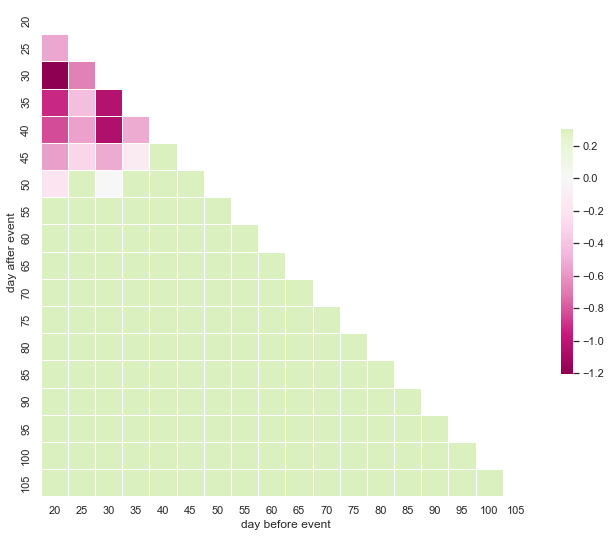

In [124]:
mask = np.triu(np.ones_like(aa, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
sns.set_style('whitegrid')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(aa, mask=mask, cmap="PiYG", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})